**<h2>Mask R-CNN</h2>**

**Imports**

In [1]:
import os
import sys
import random
import cv2
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

**Config**

In [3]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

**Create Model**

In [4]:
import tensorflow as tf
import keras
import h5py
print(tf.__version__)
print(keras.__version__)
print(h5py.__version__)

2.6.2
2.6.0
3.1.0


In [5]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead


**Class Names**

In [6]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

**Object Detection**

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


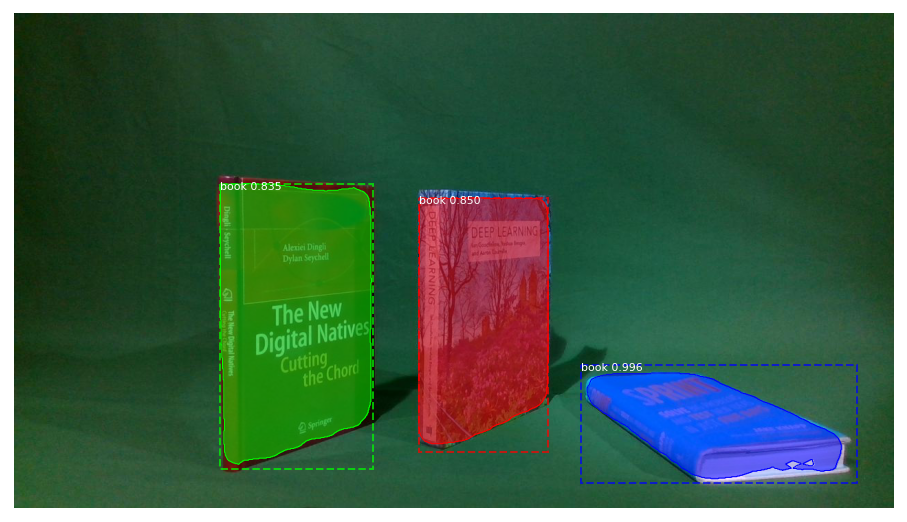

In [7]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

**Display Masks**

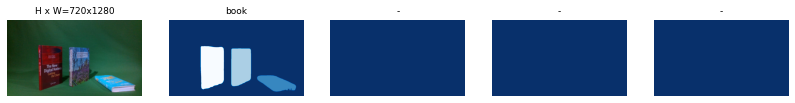

In [8]:
visualize.display_top_masks(image, r['masks'], r['class_ids'], 
                            class_names)

In [9]:
masks = {}

for i in range(len(results[0]['class_ids'])):
    masks[i] = {}
    masks[i]['mask'] = np.array(results[0]['masks'][:, :, i], dtype=np.uint8) * 255

In [10]:
masks

{0: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 1: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 2: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}}

In [11]:
all_masks = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

for i in range(len(results[0]['class_ids'])):
    all_masks += masks[i]['mask']

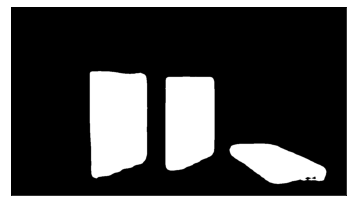

In [12]:
plt.imshow(all_masks, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

**<h2>SaRa</h2>**

In [13]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import saraRC1 as sara

In [14]:
seg_dim = 8

In [15]:
def plot_heatmap(im, grid_size, name=None):
    '''
    Given an image im, this function plots the heatmap generated by SaRa for the given grid size.
    '''

    heatmap, _ = sara.return_sara(im.copy(), grid_size)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    plt.figure(name + ' SaRa Output - Grid Size ' +
               str(grid_size) + ' x ' + str(grid_size))
    plt.gcf().set_size_inches(12, 6)
    plt.imshow(heatmap)
    plt.xticks([])
    plt.yticks([])
    plt.title('SaRa Output - Grid Size ' +
              str(grid_size) + ' x ' + str(grid_size))

In [16]:
s1 = cv2.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
heatmap, sara_list = sara.return_sara(s1.copy(), 8)

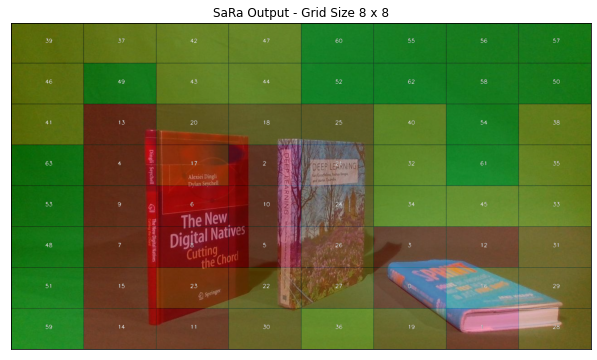

In [17]:
plot_heatmap(s1, seg_dim, 'Original')

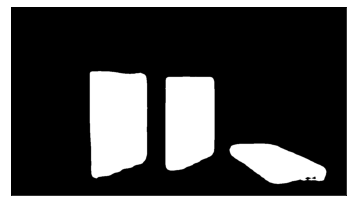

In [18]:
plt.imshow(all_masks, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

**Mask Ranking**

In [19]:
T = 0.6

In [20]:
def index_to_coordinates(index, grid_size, im_size):
    '''
    Given an index and a shape, this function returns the corresponding coordinates.
    '''

    x1 = int((index % grid_size) * (im_size[1] / grid_size))
    y1 = int((index // grid_size) * (im_size[0] / grid_size))

    x2 = int(x1 + (im_size[1] / grid_size))
    y2 = int(y1 + (im_size[0] / grid_size))
    
    return (x1, y1, x2, y2)

In [21]:
sara_list

[(24, 1984.1300726761556, 1982.5059074017047, 0.6241652744508059, 1, 63, 4),
 (13, 2279.016976465013, 2277.259118181758, 0.7578582832551991, 1, 62, 4),
 (30, 4153.124651503273, 4151.2541009399765, 0.8705505632961241, 1, 61, 4),
 (4, 6798.7169357949315, 6797.07522284615, 0.6417129487814521, 1, 60, 4),
 (56, 7767.302910275766, 7765.802910275766, 0.5, 1, 59, 4),
 (14, 7975.2865491764305, 7973.589177343255, 0.6973718331752027, 1, 58, 4),
 (7, 16312.161978398959, 16310.661978398959, 0.5, 1, 57, 4),
 (6, 17957.683198386047, 17956.108849208547, 0.5743491774985175, 1, 56, 4),
 (5, 60913.13814881841, 60911.51398354396, 0.6241652744508059, 1, 55, 4),
 (22, 66685.73707559738, 66683.93600571979, 0.8010698775896221, 1, 54, 4),
 (32, 82541.932916848, 82540.29120389922, 0.6417129487814521, 1, 53, 4),
 (12, 83397.94971623605, 83396.1705516564, 0.7791645796604999, 1, 52, 4),
 (48, 123645.2909552194, 123643.71660604191, 0.5743491774985175, 1, 51, 4),
 (15, 179661.9895797627, 179660.3824823205, 0.6070974

In [22]:
# For each segment, check which mask falls under that segment using MRn = rank(Gi); (Gi interesect Mn) > T
def mask_to_segments(s1, masks, seg_dim, T):
    sara.reset()
    _, sara_list = sara.return_sara(s1.copy(), seg_dim)

    mask_segments = {}

    for segment in sara_list:
        # Convert index to coordinates, extract segment from heatmap
        x1, y1, x2, y2 = index_to_coordinates(segment[5], seg_dim, s1.shape)

        for m in masks:
            if m not in mask_segments:
                mask_segments[m] = []

            # Extract mask from masks
            mask = masks[m]['mask'][y1:y2, x1:x2]

            # Calculate intersection over union
            intersection = np.sum(mask > 0)
            union = np.sum(mask > 0) + np.sum(mask == 0)

            iou = intersection / union

            # print('Segment: ', segment[5], 'Mask: ', m, 'IoU: ', iou)

            if iou > T:
                # index, rank
                mask_segments[m].append((segment[5], segment[0]))

    return mask_segments, len(sara_list)

**Grid-Size Experiment**

In [23]:
def grid_size(s1, masks, max_dim=20, T=0.1):
    mask_cover = {}

    for seg_dim in range(2, max_dim + 1):
        mask_segments, seg_qty = mask_to_segments(s1, masks, seg_dim, T)
        for mask in mask_segments:
            if mask not in mask_cover:
                mask_cover[mask] = {}

            # mask_cover[mask][seg_dim] = len(mask_segments[mask])
            # Ratio of (percetange of segments in grid) to (actual percentange of mask size in image)
            mask_cover[mask][seg_dim] = (len(mask_segments[mask]) / seg_qty) / (np.sum(masks[mask]['mask'] > 0) / (masks[mask]['mask'].shape[0] * masks[mask]['mask'].shape[1]))

    # plt.show()
    return mask_cover

**<h2>COCO</h2>**

In [24]:
# Import coco
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
import skimage.io as io

ann_file = 'instances_train2017.json'
coco_data = COCO(ann_file)

loading annotations into memory...
Done (t=11.37s)
creating index...
index created!


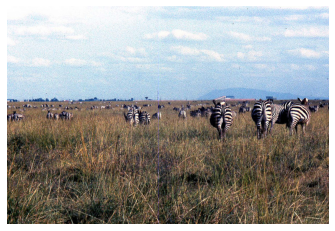

In [25]:
# get all images containing given categories, select one at random
# catIds = coco_data.getCatIds(catNms=['laptop', 'book'])
# imgIds = coco_data.getImgIds(catIds=catIds)

imgIds = coco_data.getImgIds()

# imgIds = coco_data.getImgIds(imgIds = [324158])
img = coco_data.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

I = io.imread(img['coco_url'])
plt.axis('off')
plt.rcParams['figure.figsize'] = [40, 20]
plt.imshow(I)
plt.show()

In [26]:
def grid_size(s1, masks, max_dim=20, T=0):
    mask_cover = {}

    # Precompute the sum of mask pixels to avoid repeated calculations
    mask_sizes = {m: np.sum(masks[m]['mask'] > 0) for m in masks}

    for seg_dim in range(2, max_dim + 1):
        mask_segments, seg_qty = mask_to_segments(s1, masks, seg_dim, T, mask_sizes)
        for mask in mask_segments:
            if mask not in mask_cover:
                mask_cover[mask] = {}

            # Compute the ratio efficiently using precomputed mask sizes
            mask_cover[mask][seg_dim] = (len(mask_segments[mask]) / seg_qty) / (mask_sizes[mask] / (masks[mask]['mask'].shape[0] * masks[mask]['mask'].shape[1]))

    return mask_cover

In [27]:
def mask_to_segments(s1, masks, seg_dim, T, mask_sizes):
    sara.reset()
    _, sara_list = sara.return_sara(s1.copy(), seg_dim)

    mask_segments = {}

    for segment in sara_list:
        x1, y1, x2, y2 = index_to_coordinates(segment[5], seg_dim, s1.shape)

        for m in masks:
            if m not in mask_segments:
                mask_segments[m] = []

            mask = masks[m]['mask'][y1:y2, x1:x2]

            # Calculate intersection and union using precomputed mask sizes
            intersection = np.sum(mask > 0)
            union = intersection + (mask_sizes[m] - intersection)

            iou = intersection / union

            if iou > T:
                mask_segments[m].append((segment[5], segment[0]))

    return mask_segments, len(sara_list)

In [28]:
def coco_grid_size(img):
    def anns_to_masks(anns):
        masks = {}

        for ann in anns:
            if ann['id'] not in masks:
                masks[ann['id']] = {}

            masks[ann['id']]['mask'] = coco_data.annToMask(ann)

        return masks

    anns = coco_data.loadAnns(coco_data.getAnnIds(imgIds=img['id'], iscrowd=None))
    masks = anns_to_masks(anns)
    mask_cover = grid_size(I, masks, 20, 0.5)

    return mask_cover

In [60]:
imgs = coco_data.loadImgs(imgIds)

mask_cover = []

i = 0
for img in imgs:
    mask_cover.append(coco_grid_size(img))

    i += 1

    # if i == 500:
    #     break

    print(f'{i}')

plt.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

In [61]:
object_sizes = []

for img in mask_cover:
    for mask in img:
        object_sizes.append(list(img[mask].values()))

object_sizes = np.transpose(object_sizes)

In [62]:
object_sizes.shape

(19, 5873)

In [63]:
# Save to pickle
import pickle

with open('object_sizes.pkl', 'wb') as f:
    pickle.dump(object_sizes, f)

In [ ]:
# Load from pickle
import pickle

with open('object_sizes.pkl', 'rb') as f:
    object_sizes = pickle.load(f)

In [64]:
object_sizes_no_zero = object_sizes.copy()

valid = []

for i in object_sizes_no_zero.T:
    if np.all(i != 0) and np.all(i != np.inf):
        valid.append(i)

valid = np.array(valid)

/home/matthewkenely/anaconda3/envs/sara/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/matthewkenely/anaconda3/envs/sara/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp
/home/matthewkenely/anaconda3/envs/sara/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


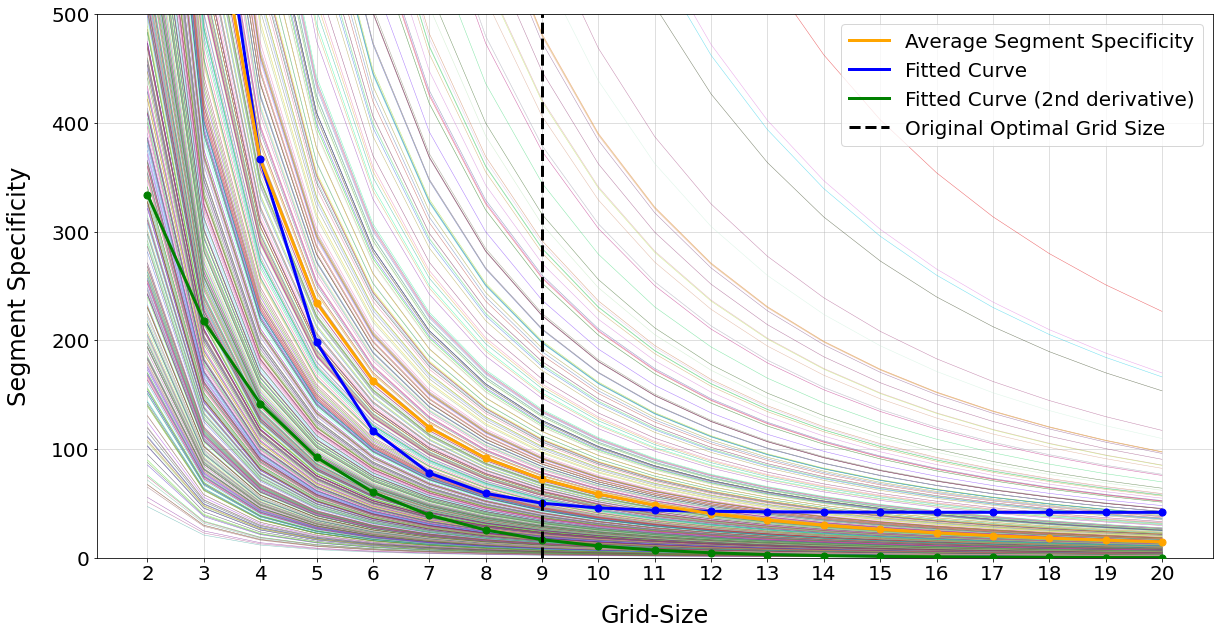

In [71]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.figure()

plt.xlabel('Grid-Size', fontsize=24, labelpad=20)
plt.ylabel('Segment Specificity', fontsize=24, labelpad=20)
# plt.title('Object Size in Image vs. Segment Dimension', fontsize=15, fontweight='bold')


plt.grid(alpha=0.5, zorder=1)

colours = []

for y in valid: 
    # print(y)
    colour = np.random.rand(3,)
    colours.append(colour)
    plt.plot(np.arange(2, 20 + 1), y, color=colour, linestyle='-', linewidth=0.5, alpha=0.6, zorder=2)

# for i, y in enumerate(valid):
#     plt.scatter(np.arange(2, 20 + 1), y, color=colours[i], s=15, alpha=0.5, zorder=3)
    

# plt.plot(np.arange(2, 20 + 1), [np.average(i) for i in valid.T], color='red', linestyle='-', label=f'Average Object Size in Image', linewidth=3, zorder=4)
# plt.scatter(np.arange(2, 20 + 1), [np.average(i) for i in valid.T], color='red', s=50, zorder=5, marker='o')

from scipy.optimize import curve_fit

def func(x, a, b, c, d, e):
    return a * np.exp(-(x - d) / e) + c

def func_derivative(x, a, b, c):
    return -a * b * np.exp(-b * x)

def func_second_derivative(x, a, b, c):
    return a * b**2 * np.exp(-b * x)

x = np.arange(2, 20 + 1, 1)
y = [np.average(i) for i in valid.T]

popt, pcov = curve_fit(func, x, y)
popt_d, pcov_d = curve_fit(func_derivative, x, np.gradient(func(x, *popt), x))
popt_dd, pcov_dd = curve_fit(func_second_derivative, x, np.gradient(func_derivative(x, *popt_d), x))

# Plot average
plt.plot(x, y, color='orange', linestyle='-', label=f'Average Segment Specificity', linewidth=3, zorder=4)
plt.scatter(x, y, color='orange', s=50, zorder=5, marker='o')

plt.plot(x, func(x, *popt), color='blue', linestyle='-', label=f'Fitted Curve', linewidth=3, zorder=3)
plt.scatter(x, func(x, *popt), color='blue', s=50, zorder=5, marker='o')

# plt.plot(x, func_derivative(x, *popt_d), color='blue', linestyle='-', label=f'Fitted Curve (1st derivative)', linewidth=3, zorder=3)
# plt.scatter(x, func_derivative(x, *popt_d), color='blue', s=50, zorder=5, marker='o')

plt.plot(x, func_second_derivative(x, *popt_dd), color='green', linestyle='-', label=f'Fitted Curve (2nd derivative)', linewidth=3, zorder=3)
plt.scatter(x, func_second_derivative(x, *popt_dd), color='green', s=50, zorder=5, marker='o')


# Plot vertical line at elbow point = 8
plt.axvline(x=9, color='black', linestyle='--', linewidth=3, zorder=6, label='Original Optimal Grid Size')

plt.xticks(np.arange(2, 20 + 1, 1), fontsize=20)
plt.yticks(fontsize=20)

plt.ylim(0, 500)

plt.legend(fontsize=20, loc='upper right')

plt.show()

/home/matthewkenely/anaconda3/envs/sara/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


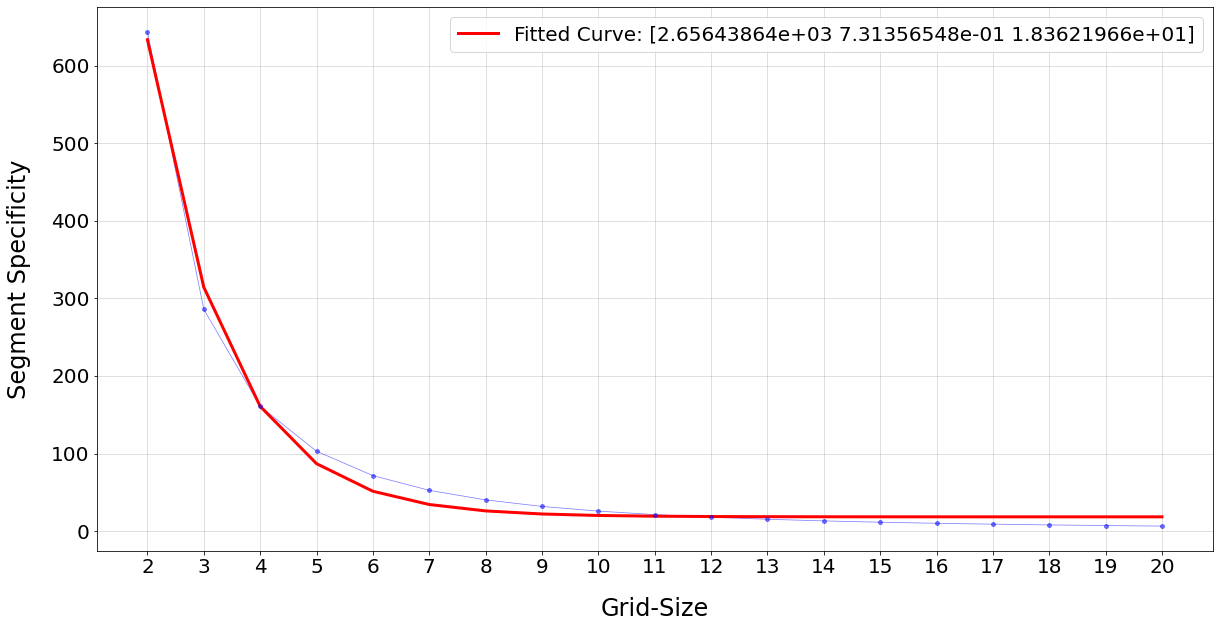

In [ ]:
# Fit a curve to valid
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.arange(2, 20 + 1)
y = [np.average(i) for i in valid.T]

popt, pcov = curve_fit(func, x, y)

plt.rcParams['figure.figsize'] = (20, 10)
plt.figure()

plt.xlabel('Grid-Size', fontsize=24, labelpad=20)
plt.ylabel('Segment Specificity', fontsize=24, labelpad=20)

plt.grid(alpha=0.5, zorder=1)

plt.plot(x, y, color='blue', linestyle='-', linewidth=0.75, alpha=0.5, zorder=2)
plt.plot(x, func(x, *popt), color='red', linestyle='-', label=f'Fitted Curve: {popt}', linewidth=3, zorder=3)
plt.scatter(x, y, color='blue', s=15, alpha=0.5, zorder=4)

plt.xticks(np.arange(2, 20 + 1, 1), fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20, loc='upper right')

plt.show()

No handles with labels found to put in legend.


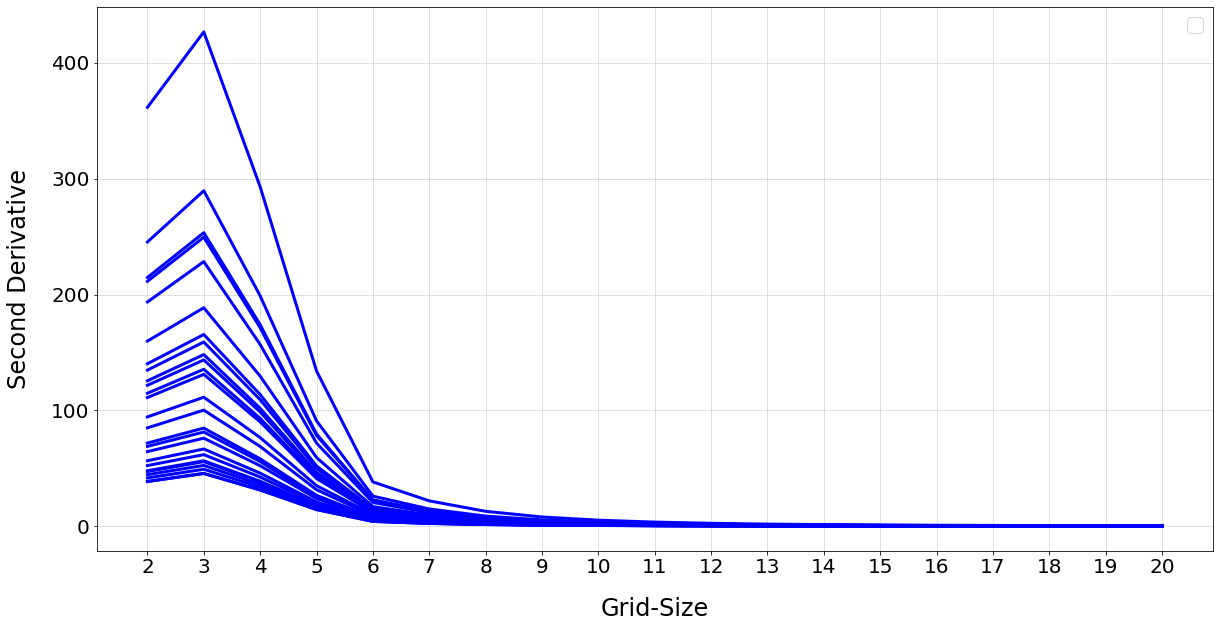

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Assuming `valid` is the data you want to analyze

# Calculate second derivative using Savitzky-Golay filter
second_derivative = savgol_filter(np.gradient(np.gradient(valid.T, axis=0), axis=0), window_length=5, polyorder=3, axis=0)
# second_derivative = second_derivative.T

# Plotting
plt.figure(figsize=(20, 10))
plt.xlabel('Grid-Size', fontsize=24, labelpad=20)
plt.ylabel('Second Derivative', fontsize=24, labelpad=20)
plt.grid(alpha=0.5, zorder=1)

# Plotting second derivative
plt.plot(np.arange(2, 20 + 1), second_derivative, color='blue', linestyle='-', linewidth=3, zorder=2)

# Marking zero crossings
# zero_crossings = np.where(np.diff(np.sign(second_derivative)))[0]
# plt.scatter(np.arange(2, 20 + 1)[zero_crossings], second_derivative[zero_crossings], color='red', s=100, zorder=3, marker='o', label='Zero Crossings')

# # Marking the maximum peak
# max_peak_index = np.argmax(second_derivative)
# plt.scatter(np.arange(2, 20 + 1)[max_peak_index], second_derivative[max_peak_index], color='green', s=200, zorder=4, marker='*', label='Maximum Peak')

plt.xticks(np.arange(2, 20 + 1, 1), fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.show()


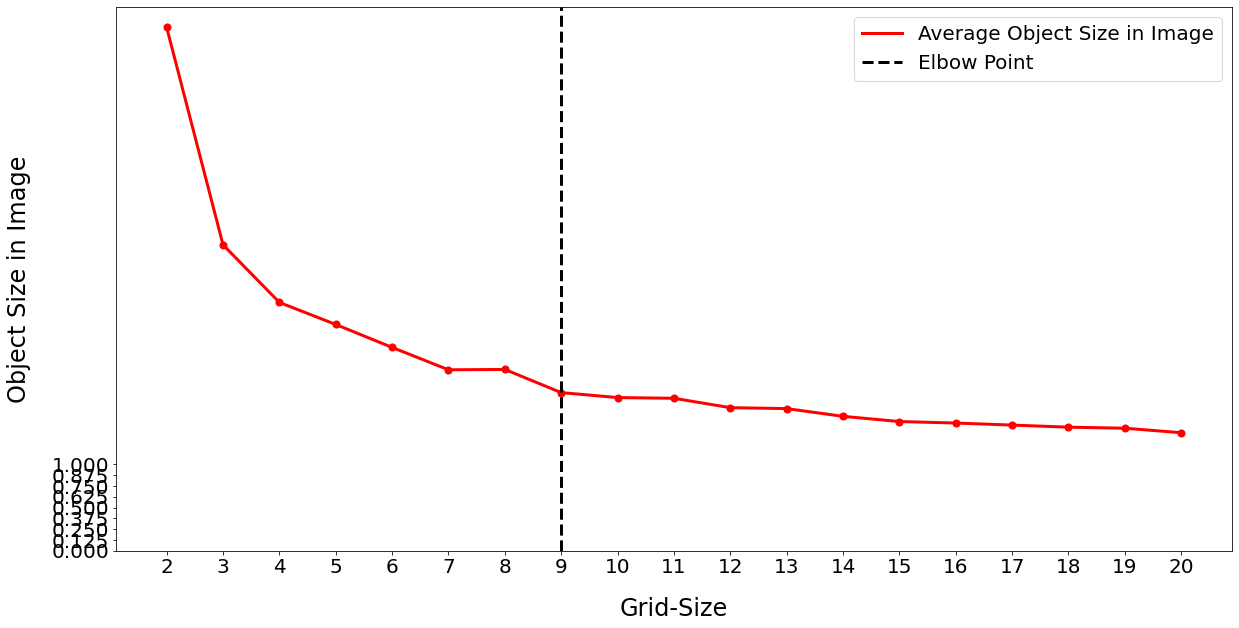

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.figure()

plt.xlabel('Grid-Size', fontsize=24, labelpad=20)
plt.ylabel('Object Size in Image', fontsize=24, labelpad=20)
# plt.title('Object Size in Image vs. Segment Dimension', fontsize=15, fontweight='bold')

# plt.grid(alpha=0.5, zorder=1)

plt.plot(np.arange(2, 20 + 1), [np.average(i) for i in valid.T], color='red', linestyle='-', label=f'Average Object Size in Image', linewidth=3, zorder=4)
plt.scatter(np.arange(2, 20 + 1), [np.average(i) for i in valid.T], color='red', s=50, zorder=5, marker='o')

plt.axvline(x=9, color='black', linestyle='--', linewidth=3, zorder=6, label='Elbow Point')

plt.xticks(np.arange(2, 20 + 1, 1), fontsize=20)
plt.yticks(np.arange(0, 1.1, 0.125), fontsize=20)
plt.legend(fontsize=20, loc='upper right')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (19,) and (385,)

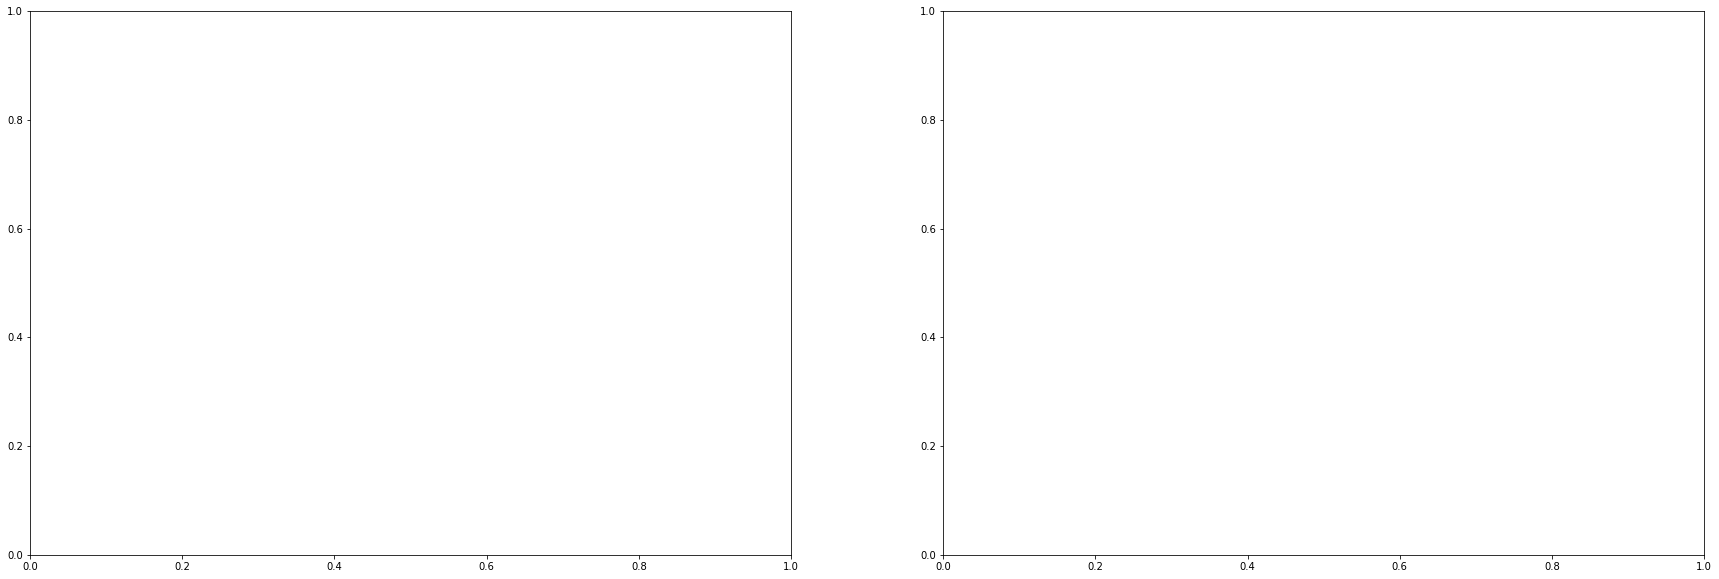

In [ ]:
# Moving average
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

# Plot moving average
plt.rcParams['figure.figsize'] = (30, 10)
plt.figure()

plt.xlabel('Segment Dimension', fontsize=15)
plt.ylabel('Object Size in Image', fontsize=15)

w = 2

s1 = plt.subplot(121)
s2 = plt.subplot(122)

for i in range(len(object_sizes)):
    s1.plot(np.arange(2, 21), object_sizes[i], label=f'Image {i}')
    s2.plot(np.arange(2, 21), moving_average(object_sizes[i], w), label=f'Image {i}')

# Plot moving average
plt.rcParams['figure.figsize'] = (30, 10)
plt.figure()

plt.xlabel('Segment Dimension', fontsize=15)
plt.ylabel('Object Size Diff.', fontsize=15)

plt.xticks(np.arange(2, 20, 1))

# s2 = plt.subplot(122)

# Plot the difference in value between each point and the one before it
for i in range(len(object_sizes)):
    plt.plot(np.arange(2, 20), np.abs(np.diff(object_sizes[i])))
    # s2.plot(np.arange(2, 20), moving_average(np.abs(np.diff(object_sizes[i])), w))

# Plot horizontal line at the max y value of the moving average
maxs1 = max([max(np.abs(np.diff(object_sizes[i]))) for i in range(len(object_sizes))])
plt.plot(np.arange(2, 20), [maxs1] * 18, 'r--')

# Plot at 50%, 25%, 10%, 5%, and 1% of maxs1
for i, c in zip([0.5, 0.25, 0.1, 0.05, 0.01], ['g', 'b', 'y', 'm', 'c']):
    plt.plot(np.arange(2, 20), [maxs1 * i] * 18, f'{c}--', label=f'{int(i * 100)}% of max')

# maxs2 = max([max(moving_average(np.abs(np.diff(object_sizes[i])), w)) for i in range(len(object_sizes))])
# s2.plot(np.arange(2, 20), [maxs2] * 18, 'r--')

# for i, c in zip([0.5, 0.25, 0.1, 0.05, 0.01], ['g', 'b', 'y', 'm', 'c']):
#     s2.plot(np.arange(2, 20), [maxs2 * i] * 18, f'{c}--')
plt.legend()

**Elbow Method**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
n_clusters_range = np.arange(2, 21)

In [ ]:
object_blobs = []

for img in object_sizes:
    for i, size in zip(np.arange(2, 21), img):
        object_blobs.append([i, size])

object_blobs = np.array(object_blobs, dtype=np.float)

In [ ]:
object_blobs

array([[ 2.        ,  4.72828764],
       [ 3.        ,  4.08394782],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.        ],
       [ 6.        ,  2.43107214],
       [ 7.        ,  0.        ],
       [ 8.        ,  1.40661917],
       [ 9.        ,  0.        ],
       [10.        ,  0.        ],
       [11.        ,  6.70605141],
       [12.        ,  0.        ],
       [13.        ,  0.        ],
       [14.        ,  0.        ],
       [15.        ,  4.09197194],
       [16.        ,  0.        ],
       [17.        ,  3.74531835],
       [18.        ,  0.        ],
       [19.        ,  0.        ],
       [20.        ,  0.        ],
       [ 2.        ,  6.30438352],
       [ 3.        ,  1.81508792],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.        ],
       [ 6.        ,  1.62071476],
       [ 7.        ,  0.        ],
       [ 8.        ,  1.25032815],
       [ 9.        ,  0.        ],
       [10.        ,  5.23609163],
       [11.        ,

In [ ]:
wcss = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(object_blobs)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[133612.12672910833,
 63526.8225333271,
 29397.942404786394,
 21346.939135372548,
 13802.970935631703,
 10297.902928093426,
 8503.355703251496,
 6948.623755986635,
 5619.030077275317,
 4757.84233646135,
 4098.248959813282,
 3690.8904501131306,
 3239.3824375255786,
 2914.274873923558,
 2677.541214470524,
 2396.89426446072,
 2168.1958782659417,
 1986.4211812911126,
 1895.5411006384813]

In [ ]:
np.diff(wcss)

array([-1547.14826544,  -540.68973128,  -345.47294002,  -253.44302924,
        -116.5921879 ,  -106.81792018,   -42.58231549,  -101.34804702,
         -68.19004492,   -57.62027641,   -29.36840892,   -29.28316952,
         -39.29396514,   -37.6048274 ,   -24.86458151,   -24.42607637,
         -16.86241208,    -5.6859549 ])

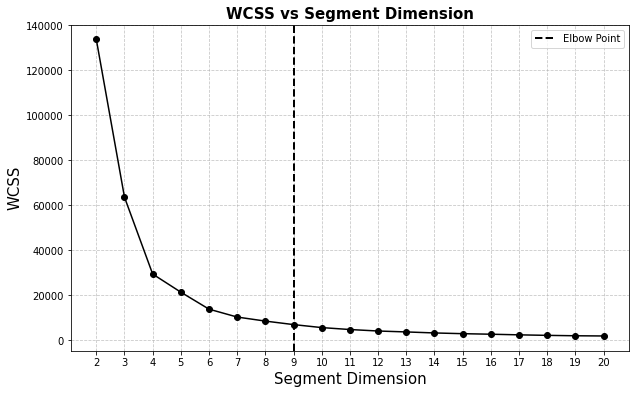

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, wcss, marker='o', color='k')
plt.title('WCSS vs Segment Dimension', fontsize=15, fontweight='bold')
plt.xlabel('Segment Dimension', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.axvline(x=9, color='black', linestyle='--', linewidth=2, zorder=6, label='Elbow Point')
plt.xticks(np.arange(2, 21))
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().patch.set_facecolor('white')  # Set background color to white
plt.legend()
plt.show()

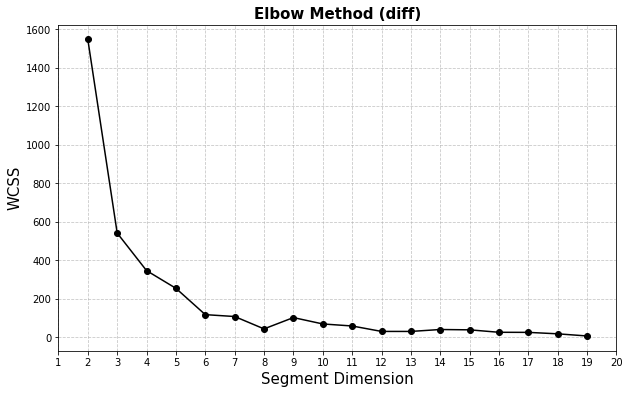

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range[:-1], np.abs(np.diff(wcss)), marker='o', color='k')
plt.title('Elbow Method (diff)', fontsize=15, fontweight='bold')
plt.xlabel('Segment Dimension', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.xticks(np.arange(1, 21))
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().patch.set_facecolor('white')  # Set background color to white
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.figure()

plt.xlabel('Grid-Size', fontsize=24, labelpad=20)
plt.ylabel('Object Size in Image', fontsize=24, labelpad=20)
# plt.title('Object Size in Image vs. Segment Dimension', fontsize=15, fontweight='bold')

# plt.grid(alpha=0.5, zorder=1)

plt.plot(np.arange(2, 20 + 1), [np.average(i) for i in valid.T], color='red', linestyle='-', label=f'Average Object Size in Image', linewidth=3, zorder=4)
plt.scatter(np.arange(2, 20 + 1), [np.average(i) for i in valid.T], color='red', s=50, zorder=5, marker='o')

plt.axvline(x=9, color='black', linestyle='--', linewidth=3, zorder=6, label='Elbow Point')

plt.xticks(np.arange(2, 20 + 1, 1), fontsize=20)
plt.yticks(np.arange(0, 1.1, 0.125), fontsize=20)
plt.legend(fontsize=20, loc='upper right')

plt.show()

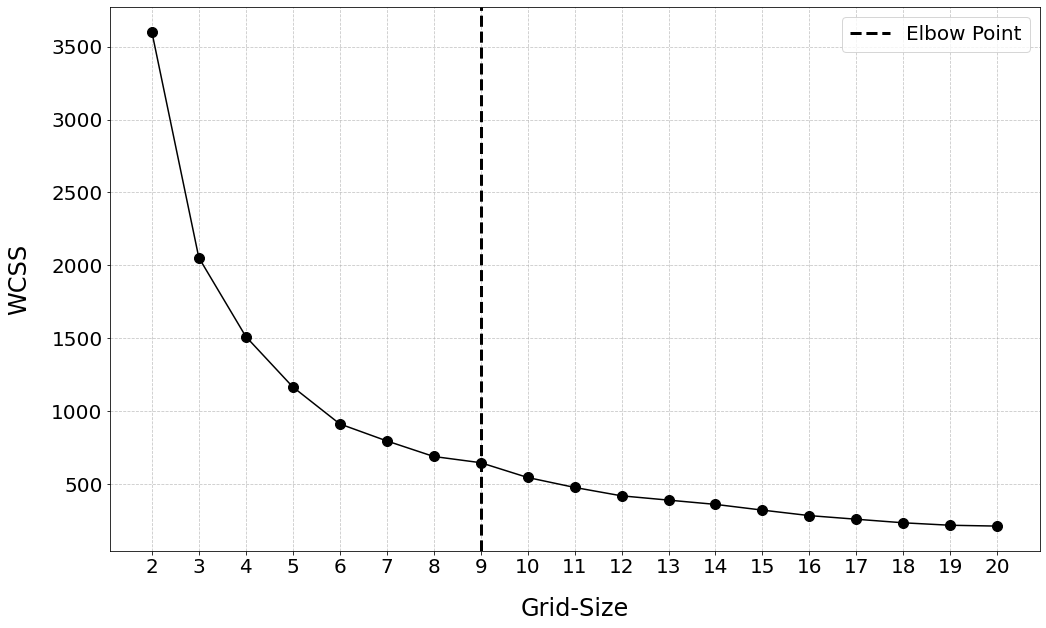

In [ ]:
plt.figure(figsize=(16.666666, 10))
plt.plot(n_clusters_range, wcss, marker='o', color=(0, 0, 0), markersize=10)
plt.xlabel('Grid-Size', fontsize=24, labelpad=20)
plt.ylabel('WCSS', fontsize=24, labelpad=20)
plt.axvline(x=9, color='black', linestyle='--', linewidth=3, zorder=6, label='Elbow Point')
plt.xticks(np.arange(2, 21), fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().patch.set_facecolor('white')  # Set background color to white
plt.legend(fontsize=20)
plt.show()

In [ ]:
"""
Segdim: 2 Average time per batch: 1.9969979763031005 per image:         0.24962474703788756,
Segdim: 3 Average time per batch: 2.0122161865234376 per image:         0.2515270233154297,
Segdim: 4 Average time per batch: 1.9523021697998046 per image:         0.24403777122497558,
Segdim: 5 Average time per batch: 1.9367088794708252 per image:         0.24208860993385314,
Segdim: 6 Average time per batch: 2.041768789291382 per image:          0.25522109866142273,
Segdim: 7 Average time per batch: 1.9928675651550294 per image:         0.24910844564437867,
Segdim: 8 Average time per batch: 2.002741050720215 per image:          0.2503426313400269,
Segdim: 9 Average time per batch: 1.9722583770751954 per image:         0.24653229713439942,
Segdim: 10 Average time per batch: 2.056066465377808 per image:         0.257008308172226,
Segdim: 11 Average time per batch: 2.0827457904815674 per image:        0.2603432238101959,
Segdim: 12 Average time per batch: 2.0226837158203126 per image:        0.2528354644775391,
Segdim: 13 Average time per batch: 2.0623186111450194 per image:        0.2577898263931274,
Segdim: 14 Average time per batch: 2.0690237998962404 per image:        0.25862797498703005,
Segdim: 15 Average time per batch: 2.1327367782592774 per image:        0.2665920972824097,
Segdim: 16 Average time per batch: 2.094260406494141 per image:         0.2617825508117676,
Segdim: 17 Average time per batch: 2.118492269515991 per image:         0.2648115336894989,
Segdim: 18 Average time per batch: 2.132029104232788 per image:         0.2665036380290985,
Segdim: 19 Average time per batch: 2.158728075027466 per image:         0.26984100937843325,
Segdim: 20 Average time per batch: 2.202997016906738 per image:         0.27537462711334226,
Segdim: 21 Average time per batch: 2.228930950164795 per image:         0.27861636877059937,
Segdim: 22 Average time per batch: 2.230399465560913 per image:         0.27879993319511415,
Segdim: 23 Average time per batch: 2.2525284767150877 per image:        0.28156605958938596,
Segdim: 24 Average time per batch: 2.272122049331665 per image:         0.2840152561664581,
Segdim: 25 Average time per batch: 2.306778001785278 per image:         0.28834725022315977,
Segdim: 26 Average time per batch: 2.286594581604004 per image:         0.2858243227005005,
Segdim: 27 Average time per batch: 2.3172255992889403 per image:        0.28965319991111754,
Segdim: 28 Average time per batch: 2.325428915023804 per image:         0.2906786143779755,
Segdim: 29 Average time per batch: 2.35954270362854 per image:          0.2949428379535675,
Segdim: 30 Average time per batch: 2.379997730255127 per image:         0.29749971628189087,
Segdim: 31 Average time per batch: 2.412652683258057 per image:         0.3015815854072571,
Segdim: 32 Average time per batch: 2.433985710144043 per image:         0.30424821376800537,
Segdim: 33 Average time per batch: 2.465236949920654 per image:         0.30815461874008176,
Segdim: 34 Average time per batch: 2.5055810451507567 per image:        0.3131976306438446,
Segdim: 35 Average time per batch: 2.5348302841186525 per image:        0.31685378551483157,
Segdim: 36 Average time per batch: 2.5793055057525636 per image:        0.32241318821907045,
Segdim: 37 Average time per batch: 2.6165881156921387 per image:        0.32707351446151733,
Segdim: 38 Average time per batch: 2.6586548328399657 per image:        0.3323318541049957,
Segdim: 39 Average time per batch: 2.677898979187012 per image:         0.3347373723983765,
Segdim: 40 Average time per batch: 2.718855953216553 per image:         0.3398569941520691,
Segdim: 41 Average time per batch: 2.7616593837738037 per image:        0.34520742297172546,
Segdim: 42 Average time per batch: 2.802906131744385 per image:         0.3503632664680481,
Segdim: 43 Average time per batch: 2.841261386871338 per image:         0.35515767335891724,
Segdim: 44 Average time per batch: 2.8970131397247316 per image:        0.36212664246559145,
Segdim: 45 Average time per batch: 2.954011154174805 per image:         0.3692513942718506,
Segdim: 46 Average time per batch: 3.005013608932495 per image:         0.3756267011165619,
Segdim: 47 Average time per batch: 3.0585188388824465 per image:        0.3823148548603058,
Segdim: 48 Average time per batch: 3.101443862915039 per image:         0.3876804828643799,
Segdim: 49 Average time per batch: 3.1466381549835205 per image:        0.39332976937294006,
Segdim: 50 Average time per batch: 3.19333438873291 per image:          0.39916679859161375,
Segdim: 51 Average time per batch: 3.272959280014038 per image:         0.40911991000175474,
Segdim: 52 Average time per batch: 3.2835490226745607 per image:        0.4104436278343201,
Segdim: 53 Average time per batch: 3.343720245361328 per image:         0.417965030670166,
Segdim: 54 Average time per batch: 3.3953630924224854 per image:        0.42442038655281067,
Segdim: 55 Average time per batch: 3.4710724353790283 per image:        0.43388405442237854,
Segdim: 56 Average time per batch: 3.530845785140991 per image:         0.4413557231426239,
Segdim: 57 Average time per batch: 3.557187032699585 per image:         0.44464837908744814,
Segdim: 58 Average time per batch: 3.655172824859619 per image:         0.4568966031074524,
Segdim: 59 Average time per batch: 3.679308795928955 per image:         0.4599135994911194,
Segdim: 60 Average time per batch: 3.7397706508636475 per image:        0.46747133135795593,
Segdim: 61 Average time per batch: 3.8039791107177736 per image:        0.4754973888397217,
Segdim: 62 Average time per batch: 3.9226418495178224 per image:        0.4903302311897278,
Segdim: 63 Average time per batch: 4.009250926971435 per image:         0.5011563658714294,
Segdim: 64 Average time per batch: 4.071699857711792 per image:         0.508962482213974,
Segdim: 65 Average time per batch: 4.265418338775635 per image:         0.5331772923469543,
Segdim: 66 Average time per batch: 4.2804868698120115 per image:        0.5350608587265014,
Segdim: 67 Average time per batch: 4.339093828201294 per image:         0.5423867285251618,
Segdim: 68 Average time per batch: 4.463777256011963 per image:         0.5579721570014954,
Segdim: 69 Average time per batch: 4.31727819442749 per image:          0.5396597743034363,
Segdim: 70 Average time per batch: 4.4987047672271725 per image:        0.5623380959033966,
Segdim: 71 Average time per batch: 4.585271167755127 per image:         0.5731588959693908,
Segdim: 72 Average time per batch: 4.631251287460327 per image:         0.5789064109325409,
Segdim: 73 Average time per batch: 4.702368974685669 per image:         0.5877961218357086,
Segdim: 74 Average time per batch: 4.770372200012207 per image:         0.5962965250015259,
Segdim: 75 Average time per batch: 4.850266170501709 per image:         0.6062832713127136,
Segdim: 76 Average time per batch: 4.9297873973846436 per image:        0.6162234246730804,
Segdim: 77 Average time per batch: 5.005164384841919 per image:         0.6256455481052399,
Segdim: 78 Average time per batch: 5.1000322818756105 per image:        0.6375040352344513,
Segdim: 79 Average time per batch: 5.1827857971191404 per image:        0.6478482246398926,
Segdim: 80 Average time per batch: 5.2753900527954105 per image:        0.6594237565994263,
Segdim: 81 Average time per batch: 5.307163333892822 per image:         0.6633954167366027,
Segdim: 82 Average time per batch: 5.475574922561646 per image:         0.6844468653202057,
Segdim: 83 Average time per batch: 5.598148536682129 per image:         0.6997685670852661,
Segdim: 84 Average time per batch: 5.637467670440674 per image:         0.7046834588050842,
Segdim: 85 Average time per batch: 5.642467784881592 per image:         0.705308473110199,
Segdim: 86 Average time per batch: 5.822702789306641 per image:         0.7278378486633301,
Segdim: 87 Average time per batch: 5.913760709762573 per image:         0.7392200887203216,
Segdim: 88 Average time per batch: 6.010120964050293 per image:         0.7512651205062866,
Segdim: 89 Average time per batch: 6.0339618682861325 per image:        0.7542452335357666,
Segdim: 90 Average time per batch: 6.099177742004395 per image:         0.7623972177505494,
Segdim: 91 Average time per batch: 6.183317375183106 per image:         0.7729146718978882,
Segdim: 92 Average time per batch: 6.240511226654053 per image:         0.7800639033317566,
Segdim: 93 Average time per batch: 6.341656160354614 per image:         0.7927070200443268,
Segdim: 94 Average time per batch: 6.510356187820435 per image:         0.8137945234775543,
Segdim: 95 Average time per batch: 6.620381784439087 per image:         0.8275477230548859,
Segdim: 96 Average time per batch: 6.764133310317993 per image:         0.8455166637897491,
Segdim: 97 Average time per batch: 6.8207728385925295 per image:        0.8525966048240662,
Segdim: 98 Average time per batch: 6.954723787307739 per image:         0.8693404734134674,
Segdim: 99 Average time per batch: 7.065685701370239 per image:         0.8832107126712799,
Segdim: 100 Average time per batch: 7.069089651107788 per image:        0.8836362063884735,
"""

In [2]:
times = [
    0.24962474703788756,
    0.2515270233154297,
    0.24403777122497558,
    0.24208860993385314,
    0.25522109866142273,
    0.24910844564437867,
    0.2503426313400269,
    0.24653229713439942,
    0.257008308172226,
    0.2603432238101959,
    0.2528354644775391,
    0.2577898263931274,
    0.25862797498703005,
    0.2665920972824097,
    0.2617825508117676,
    0.2648115336894989,
    0.2665036380290985,
    0.26984100937843325,
    0.27537462711334226,
    0.27861636877059937,
    0.27879993319511415,
    0.28156605958938596,
    0.2840152561664581,
    0.28834725022315977,
    0.2858243227005005,
    0.28965319991111754,
    0.2906786143779755,
    0.2949428379535675,
    0.29749971628189087,
    0.3015815854072571,
    0.30424821376800537,
    0.30815461874008176,
    0.3131976306438446,
    0.31685378551483157,
    0.32241318821907045,
    0.32707351446151733,
    0.3323318541049957,
    0.3347373723983765,
    0.3398569941520691,
    0.34520742297172546,
    0.3503632664680481,
    0.35515767335891724,
    0.36212664246559145,
    0.3692513942718506,
    0.3756267011165619,
    0.3823148548603058,
    0.3876804828643799,
    0.39332976937294006,
    0.39916679859161375,
    0.40911991000175474,
    0.4104436278343201,
    0.417965030670166,
    0.42442038655281067,
    0.43388405442237854,
    0.4413557231426239,
    0.44464837908744814,
    0.4568966031074524,
    0.4599135994911194,
    0.46747133135795593,
    0.4754973888397217,
    0.4903302311897278,
    0.5011563658714294,
    0.508962482213974,
    0.5331772923469543,
    0.5350608587265014,
    0.5423867285251618,
    0.5579721570014954,
    0.5396597743034363,
    0.5623380959033966,
    0.5731588959693908,
    0.5789064109325409,
    0.5877961218357086,
    0.5962965250015259,
    0.6062832713127136,
    0.6162234246730804,
    0.6256455481052399,
    0.6375040352344513,
    0.6478482246398926,
    0.6594237565994263,
    0.6633954167366027,
    0.6844468653202057,
    0.6997685670852661,
    0.7046834588050842,
    0.705308473110199,
    0.7278378486633301,
    0.7392200887203216,
    0.7512651205062866,
    0.7542452335357666,
    0.7623972177505494,
    0.7729146718978882,
    0.7800639033317566,
    0.7927070200443268,
    0.8137945234775543,
    0.8275477230548859,
    0.8455166637897491,
    0.8525966048240662,
    0.8693404734134674,
    0.8832107126712799,
    0.8836362063884735,
]

In [3]:
sor = {
    2: 0.6434399314082918,
    10: 0.713736429908322,
    20: 0.7334073292610058,
    30: 0.7429809930575493,
    40: 0.7342411966442,
    50: 0.7310825206710648,
    60: 0.7384563464905489,
    70: 0.7389206930983722,
    80: 0.7363958835114807,
    90: 0.7528487342461657,
    100: 0.7507936316597129,
}

In [4]:
max_sor, max_sor_index = max([(v, k) for k, v in sor.items()])
optimal_sor, optimal_sor_index = 0.7429809930575493, 30

In [5]:
max_sor, max_sor_index

(0.7528487342461657, 90)

In [6]:
3/2 * 100

150.0

In [7]:
max_sor / optimal_sor * 100

101.32812834794176

In [8]:
0.7528487342461657 

0.7528487342461657

In [9]:
times[max_sor_index - 2]

0.7623972177505494

In [10]:
times[9 - 2]

0.24653229713439942

In [11]:
times[optimal_sor_index - 2]

0.29749971628189087

In [12]:
times[optimal_sor_index - 2] / times[9 - 2] * 100

120.6737290569706

In [13]:
0.7623972177505494 / 0.29749971628189087

2.5626821674954225

In [16]:
sor[10]

0.713736429908322

In [17]:
0.743 - 0.714

0.029000000000000026

In [21]:
0.743 / 0.714 * 100

104.06162464985995

In [19]:
0.724 - 0.654

0.06999999999999995

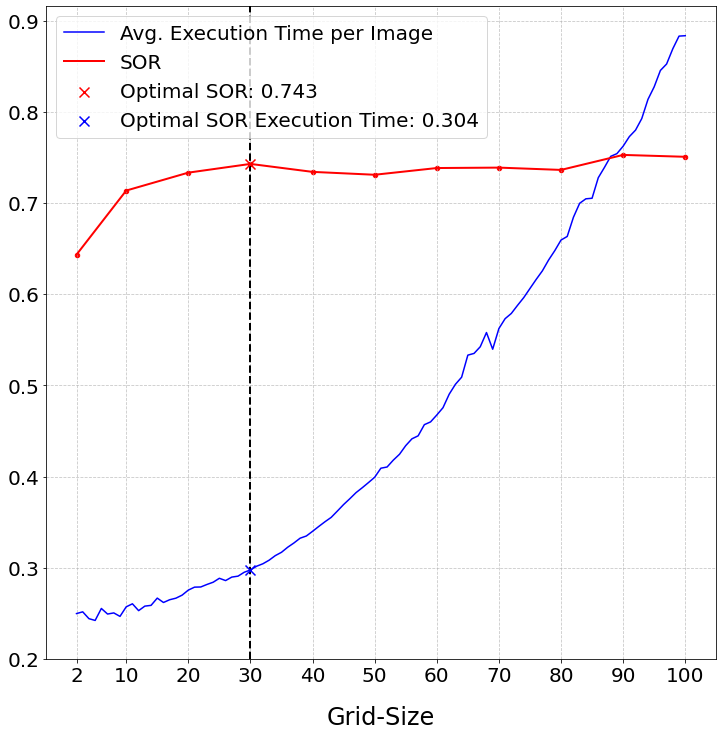

In [14]:
plt.figure(figsize=(12, 12))
plt.plot(np.arange(2, 101), times, color='blue', label='Avg. Execution Time per Image')

plt.plot(list(sor.keys()), list(sor.values()), color='r', linestyle='-', linewidth=2, label='SOR')
plt.scatter(list(sor.keys()), list(sor.values()), color='r', s=20)

# plt.axvline(max_sor_index, color='k', linestyle='--', linewidth=2)
# plt.scatter(max_sor_index, max_sor, color='red', marker='x', s=100, zorder=5, label=f'Max SOR: {max_sor:.3f}')
# plt.scatter(max_sor_index, times[max_sor_index - 2], color='blue', marker='x', s=100, zorder=5, label=f'Max SOR Execution Time: {times[max_sor_index]:.3f}')

plt.axvline(optimal_sor_index, color='k', linestyle='--', linewidth=2)
plt.scatter(optimal_sor_index, optimal_sor, color='red', marker='x', s=100, zorder=5, label=f'Optimal SOR: {optimal_sor:.3f}')
plt.scatter(optimal_sor_index, times[optimal_sor_index - 2], color='blue', marker='x', s=100, zorder=5, label=f'Optimal SOR Execution Time: {times[optimal_sor_index]:.3f}')


plt.xlabel('Grid-Size', fontsize=24, labelpad=20)
# plt.ylabel('Avg. Execution Time per Image', fontsize=24, labelpad=20)
plt.xticks([2] + [i for i in np.arange(0, 101, 10) if i not in [0, 1]], fontsize=20)
plt.yticks(np.arange(0.2, 1, 0.1), fontsize=20)

plt.grid(True, linestyle='--', alpha=0.7)
# plt.gca().patch.set_facecolor('white')  # Set background color to white

plt.legend(fontsize=20)

plt.show()